# Basic EDA Analysis

## Import required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import nltk
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
import string
import re
nltk.download('punkt_tab')
# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to /home/zhaoz/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to /home/zhaoz/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/zhaoz/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Load the dataset

In [2]:
df = pd.read_csv('../data/raw/Restaurant_Reviews.tsv', sep='\t')
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [3]:
df.tail()

,Review,Liked
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0
999,"Then, as if I hadn't wasted enough of my life ...",0


In [4]:
# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
df.info()

Dataset Shape: (1000, 2)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [5]:
# Display basic statistics
print("\nBasic Statistics:")
print(df.describe())


Basic Statistics:
            Liked
count  1000.00000
mean      0.50000
std       0.50025
min       0.00000
25%       0.00000
50%       0.50000
75%       1.00000
max       1.00000


In [6]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Review    0
Liked     0
dtype: int64


## Histogram Plot to See the Distribution of 'Liked'

/tmp/ipykernel_53093/4169419256.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Liked', palette=['red', 'green'])


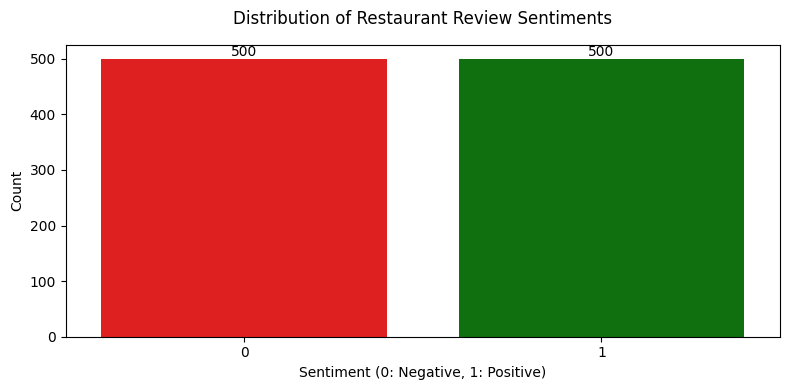


Sentiment Distribution (%):
       Count  Percentage
Liked                   
1        500        50.0
0        500        50.0


In [7]:
# Set figure size
plt.figure(figsize=(8, 4))

# Create count plot
sns.countplot(data=df, x='Liked', palette=['red', 'green'])

plt.title('Distribution of Restaurant Review Sentiments', fontsize=12, pad=15)
plt.xlabel('Sentiment (0: Negative, 1: Positive)', fontsize=10)
plt.ylabel('Count', fontsize=10)

# Add value labels on top of each bar
for i in df['Liked'].value_counts().items():
    plt.text(i[0], i[1], str(i[1]), ha='center', va='bottom')

# Adjust layout and display
plt.tight_layout()
plt.show()

# Print percentage distribution
print("\nSentiment Distribution (%):")
percentage_dist = df['Liked'].value_counts(normalize=True).round(3) * 100
print(pd.DataFrame({
    'Count': df['Liked'].value_counts(),
    'Percentage': percentage_dist
}).round(2))

In [8]:
# Text preprocessing function
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove extra whitespace
    text = ' '.join(text.split())
    return text

# Tokenization and filtering function
def get_tokens(text):
    # Get stop words
    stop_words = set(stopwords.words('english'))
    custom_stop_words = {'food', 'restaurant', 'place'}
    stop_words.update(custom_stop_words)
    
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stop words and short words
    tokens = [word for word in tokens if word not in stop_words and len(word) > 2]
    return tokens

# Process all reviews
def get_word_freq(df, sentiment=None):
    if sentiment is not None:
        reviews = df[df['Liked'] == sentiment]['Review']
    else:
        reviews = df['Review']
        
    # Preprocess and tokenize all reviews
    all_tokens = []
    for review in reviews:
        processed_text = preprocess_text(review)
        tokens = get_tokens(processed_text)
        all_tokens.extend(tokens)
    
    # Get frequency distribution
    return Counter(all_tokens)

# Get frequency distributions
positive_freq = get_word_freq(df, sentiment=1)
negative_freq = get_word_freq(df, sentiment=0)

# Plot function for word frequencies
def plot_word_freq(freq_dist, title, n_words=15, color='blue'):
    plt.figure(figsize=(10, 5))
    
    # Get the n most common words and their frequencies
    words, freqs = zip(*freq_dist.most_common(n_words))

    sns.barplot(x=list(freqs), y=list(words), color=color, alpha=0.6)
    
    plt.title(title, fontsize=12, pad=15)
    plt.xlabel('Frequency', fontsize=10)
    plt.ylabel('Words', fontsize=10)
    
    # Add frequency values on bars
    for i, v in enumerate(freqs):
        plt.text(v, i, f' {v}', va='center')
    
    plt.tight_layout()
    plt.show()


## Plot positive and negative word frequencies

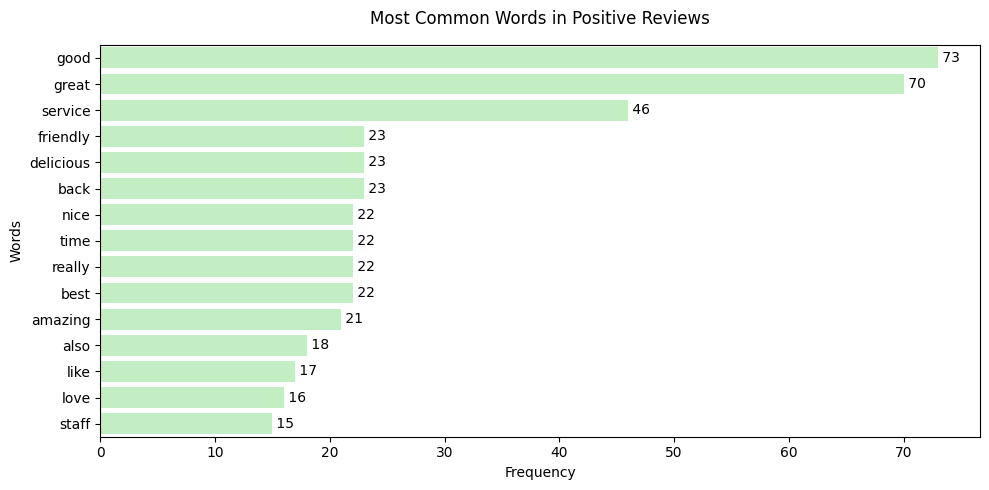

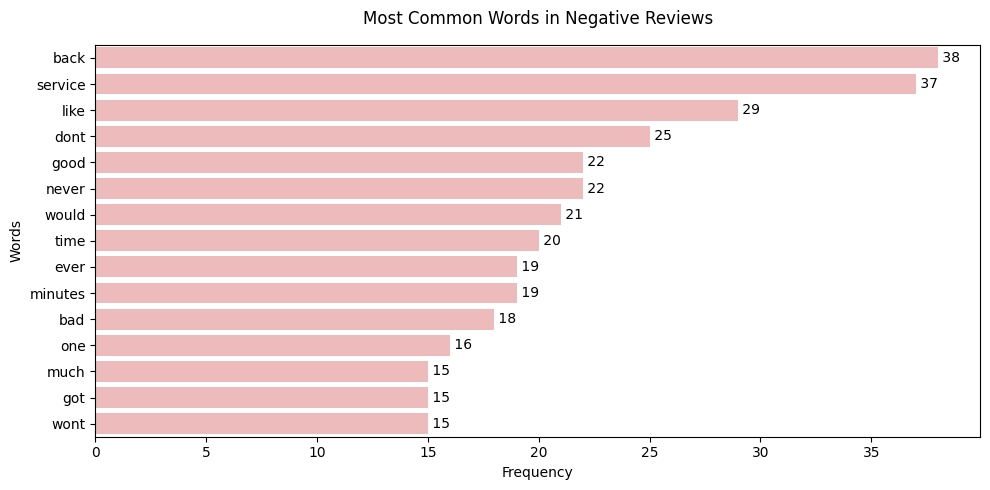


Top 10 words in Positive Reviews:
good: 73
great: 70
service: 46
friendly: 23
delicious: 23
back: 23
nice: 22
time: 22
really: 22
best: 22

Top 10 words in Negative Reviews:
back: 38
service: 37
like: 29
dont: 25
good: 22
never: 22
would: 21
time: 20
ever: 19
minutes: 19


In [9]:
plot_word_freq(positive_freq, 'Most Common Words in Positive Reviews', color='lightgreen')
plot_word_freq(negative_freq, 'Most Common Words in Negative Reviews', color='lightcoral')

print("\nTop 10 words in Positive Reviews:")
for word, freq in positive_freq.most_common(10):
    print(f"{word}: {freq}")

print("\nTop 10 words in Negative Reviews:")
for word, freq in negative_freq.most_common(10):
    print(f"{word}: {freq}")

## Plot word usage comparison

In [10]:
# Compare word usage between positive and negative reviews
def compare_word_usage(pos_freq, neg_freq, n_words=10):
    # Get total counts for normalization
    total_pos = sum(pos_freq.values())
    total_neg = sum(neg_freq.values())
    
    # Get words that appear in both
    common_words = set(dict(pos_freq.most_common(30)).keys()) & set(dict(neg_freq.most_common(30)).keys())
    
    # Calculate relative frequencies
    word_comparisons = []
    for word in common_words:
        pos_rel_freq = (pos_freq[word] / total_pos) * 100
        neg_rel_freq = (neg_freq[word] / total_neg) * 100
        difference = pos_rel_freq - neg_rel_freq
        word_comparisons.append((word, difference))
    
    # Sort by absolute difference
    word_comparisons.sort(key=lambda x: abs(x[1]), reverse=True)
    
    return word_comparisons[:n_words]

/tmp/ipykernel_53093/62962696.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(differences), y=list(words), palette=colors)


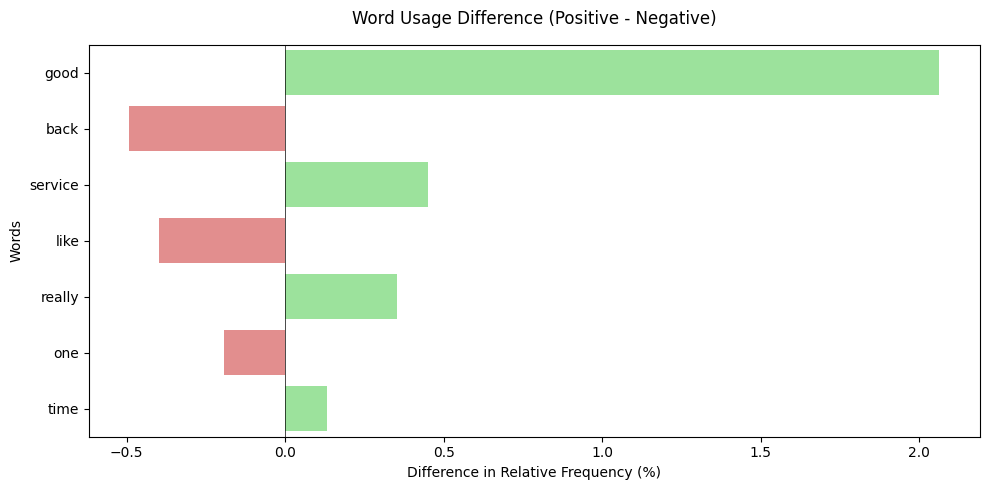


Word Usage Comparison (Positive vs Negative):
good: More positive by 2.06%
back: More negative by 0.49%
service: More positive by 0.45%
like: More negative by 0.40%
really: More positive by 0.35%
one: More negative by 0.19%
time: More positive by 0.13%


In [11]:
comparisons = compare_word_usage(positive_freq, negative_freq)
words, differences = zip(*comparisons)

plt.figure(figsize=(10, 5))
colors = ['lightgreen' if d > 0 else 'lightcoral' for d in differences]
sns.barplot(x=list(differences), y=list(words), palette=colors)
plt.title('Word Usage Difference (Positive - Negative)', fontsize=12, pad=15)
plt.xlabel('Difference in Relative Frequency (%)', fontsize=10)
plt.ylabel('Words', fontsize=10)
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
plt.tight_layout()
plt.show()

# Print word usage comparison
print("\nWord Usage Comparison (Positive vs Negative):")
for word, diff in comparisons:
    print(f"{word}: {'More positive' if diff > 0 else 'More negative'} by {abs(diff):.2f}%")

## Data Distribution & Quality

- Perfect balance in sentiment distribution: 500 positive (1) and 500 negative (0) reviews
- No missing values in both Review and Liked columns
- Small dataset size (1000 rows) makes it manageable for modeling (probably not enough for training a new complex model, take try transfer learning / fine-tuned model)
- Binary classification task with balanced classes (no need for class balancing techniques)

## Word Usage Analysis

### Positive Reviews Top Words

- Most frequent positive words: "good" (73), "great" (70), "service" (46)
- Strong positive sentiment words: "delicious", "amazing", "best", "love"
- Customer service-related words prominent: "friendly", "service", "staff"

### Negative Reviews Top Words

- Most frequent negative indicators: "back" (38), "service" (37), "don't" (25)
- Time-related complaints common: "time", "minutes", "never"
- Negative modifiers: "bad", "never", "won't"